In [19]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt


In [20]:
# Define the universe of discourse
temperature = ctrl.Antecedent(np.arange(0, 41, 1), 'temperature')
humidity = ctrl.Antecedent(np.arange(0, 101, 1), 'humidity')
quality = ctrl.Consequent(np.arange(0, 11, 1), 'quality')

# Define membership functions
temperature['cold'] = fuzz.trimf(temperature.universe, [0, 0, 20])
temperature['warm'] = fuzz.trimf(temperature.universe, [15, 25, 35])
temperature['hot'] = fuzz.trimf(temperature.universe, [30, 40, 40])

humidity['dry'] = fuzz.trimf(humidity.universe, [0, 0, 30])
humidity['comfortable'] = fuzz.trimf(humidity.universe, [20, 50, 80])
humidity['humid'] = fuzz.trimf(humidity.universe, [70, 100, 100])

quality['poor'] = fuzz.trimf(quality.universe, [0, 0, 5])
quality['average'] = fuzz.trimf(quality.universe, [0, 5, 10])
quality['good'] = fuzz.trimf(quality.universe, [5, 10, 10])


C:\Users\varsh\AppData\Roaming\Python\Python312\site-packages\skfuzzy\control\fuzzyvariable.py:125: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


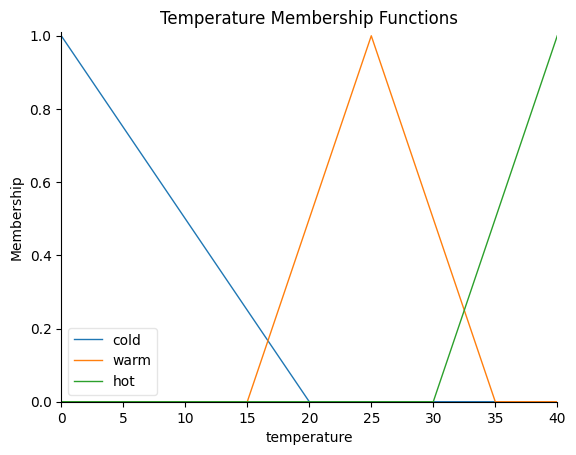

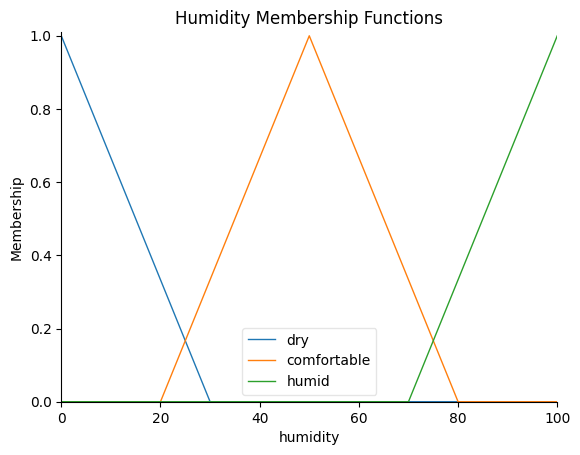

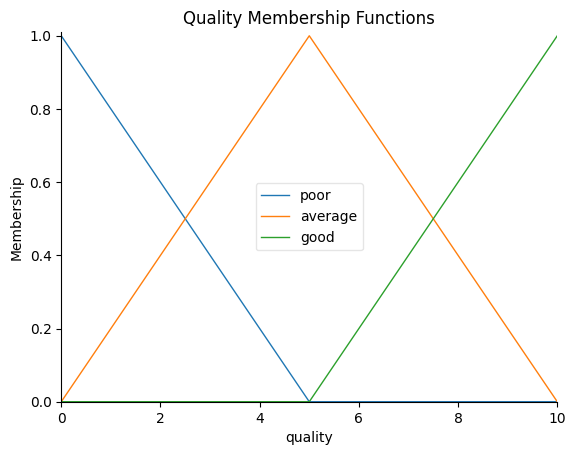

In [21]:
# Visualize membership functions
temperature.view()
plt.title('Temperature Membership Functions')
plt.show()

humidity.view()
plt.title('Humidity Membership Functions')
plt.show()

quality.view()
plt.title('Quality Membership Functions')
plt.show()


In [22]:
# Define fuzzy rules
rule1 = ctrl.Rule(temperature['cold'] & humidity['dry'], quality['poor'])
rule2 = ctrl.Rule(temperature['warm'] & humidity['comfortable'], quality['average'])
rule3 = ctrl.Rule(temperature['hot'] & humidity['humid'], quality['good'])

# Create the control system and simulation
quality_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])
quality_sim = ctrl.ControlSystemSimulation(quality_ctrl)


In [23]:
# Simulate the system with sample inputs
quality_sim.input['temperature'] = 25
quality_sim.input['humidity'] = 60

# Compute the output
quality_sim.compute()

# Print the results
quality_sim.output['quality']


np.float64(5.000000000000002)

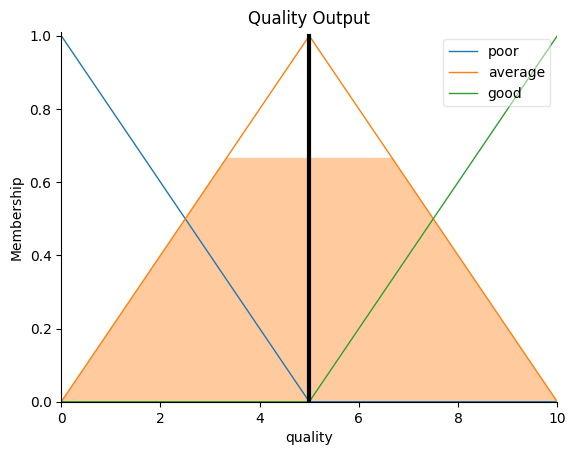

In [24]:
# Visualize the output
quality.view(sim=quality_sim)
plt.title('Quality Output')
plt.show()
